# <center><b><u>Hand Written Digit Recognition using CNN</u></b> </center>

### **Importing Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import os
for dirname, _, filenames in os.walk('D:\hand-written-digit-recognition-using-mnist-dataset.ipynb'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### **Reading Training and Testing CSV Files**

In [9]:
train_df=pd.read_csv('D:\hand-written-digit-recognition-using-mnist-dataset.ipynb')
test_df=pd.read_csv('D:\hand-written-digit-recognition-using-mnist-dataset.ipynb')

In [10]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Seperating the Feature and the target columns**

In [12]:
x=train_df.drop('label',axis=1).values
y=train_df['label'].values

### **Distribution of images of digits in the dataset**

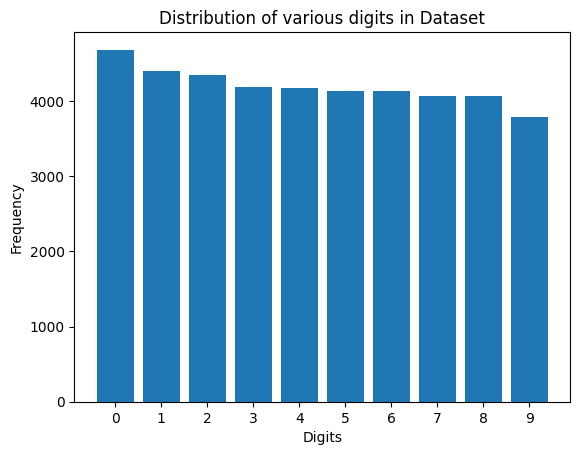

In [13]:
plt.bar(list(range(10)),train_df['label'].value_counts())
plt.xticks(list(range(10)))
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Distribution of various digits in Dataset')
plt.show()

### **Displaying single Image**

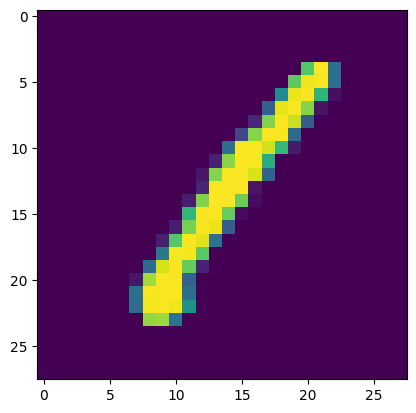

In [14]:
plt.imshow(x[0:1,:].reshape(28,28))
plt.show()

### **Displaying Random images as a grid**

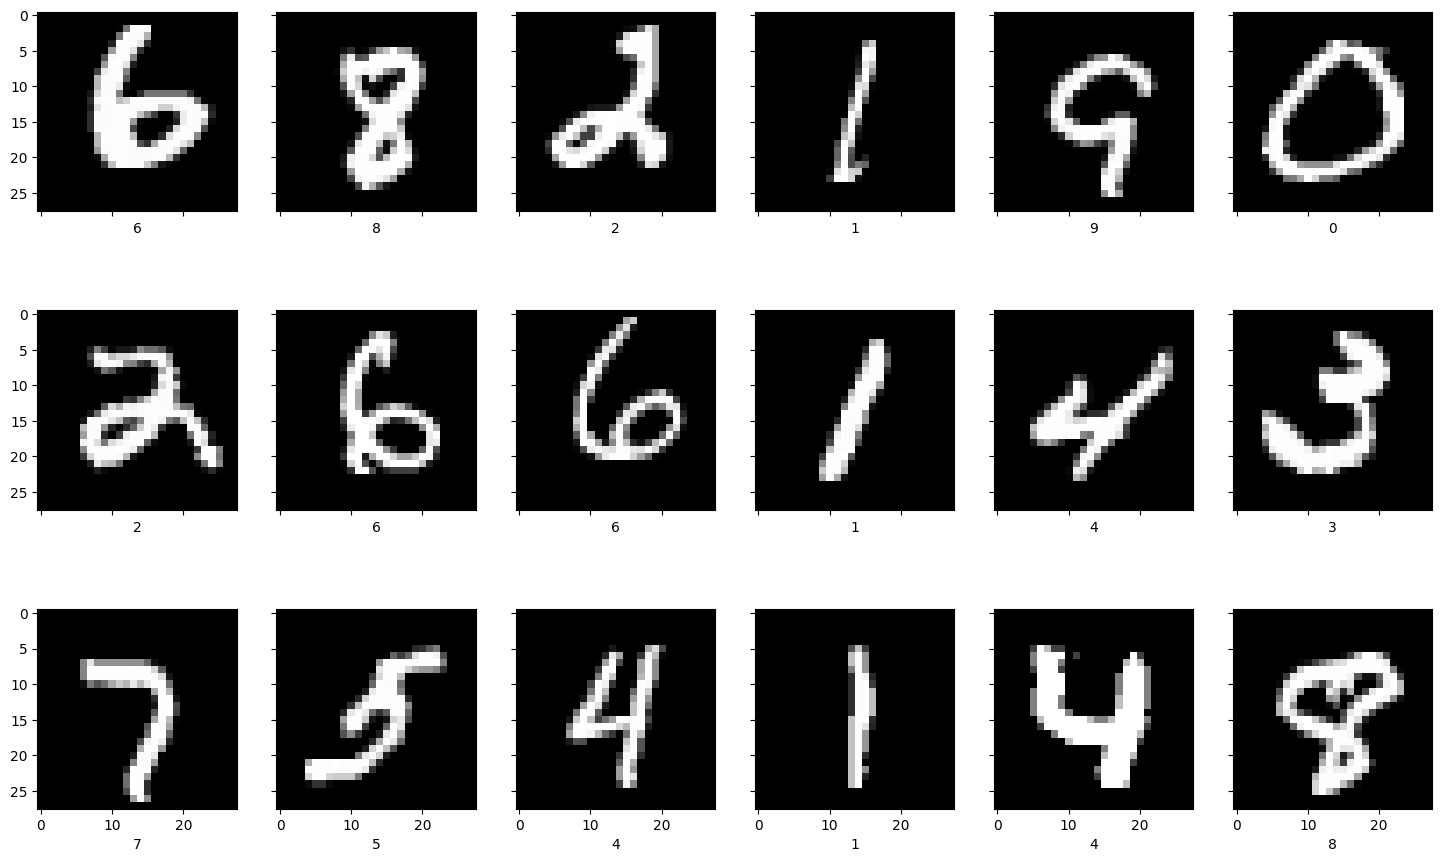

In [15]:
fig,axes=plt.subplots(3,6,figsize=(18,11),sharex=True,sharey=True)
for i,axes in enumerate(axes.flat):
    random_digit=np.random.randint(0,y.shape[0])
    axes.set_xlabel(y[random_digit])
    axes.imshow(x[random_digit].reshape(28,28),cmap='gray')

### **Converting the Fetures into a format that is accepted by the Nerual network for training**

In [16]:
from tensorflow import keras
x=x/255
x_reshaped=x.reshape(x.shape[0],28,28,1)
classes_count=len(np.unique(y))
y_categorical=keras.utils.to_categorical(y,classes_count)

### **Splitting the Dataset into Training, Testing and Cross Validation Datasets**

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_reshaped,y_categorical,test_size=0.2,stratify=y)
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

## **Building a Convolution Neural Network**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam
model=Sequential()
filters_count=64
filter1_size=(5,5)
filter2_size=(3,3)
pool_kernel_size=(2,2)
node_count=500
model.add(Conv2D(
          filters_count,
          filter1_size,
          input_shape=(x_train.shape[1],x_train.shape[2],1),
          activation='relu'
))
model.add(Conv2D(
          filters_count,
          filter1_size,
          activation='relu'
))
model.add(MaxPooling2D(pool_size=pool_kernel_size))
model.add(Conv2D(
          filters_count//2,
          filter1_size,
          input_shape=(x_train.shape[1],x_train.shape[2],1),
          activation='relu'
))
model.add(Conv2D(
          filters_count//2,
          filter1_size,
          input_shape=(x_train.shape[1],x_train.shape[2],1),
          activation='relu'
))
model.add(MaxPooling2D(pool_size=pool_kernel_size))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(node_count,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes_count,activation='softmax'))
model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics='accuracy')


### **Adding callbacks to save the best model and to stop training when there is no significant change in the Validation Accuracy**

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
earlyStopping=EarlyStopping(monitor='accuracy',mode='min',verbose=1,patience=50)
checkpoints=ModelCheckpoint("Digit_Recognizer.h5",monitor='val_accuracy',mode='min',save_best_only=True)

### **Training the CNN model with the train datasest**

In [21]:
history=model.fit(
    x_train,
    y_train,
    batch_size=50,
    epochs=10,
    validation_data=(x_cv,y_cv),
    callbacks=[earlyStopping,checkpoints])

Epoch 1/10
538/538 [==============================] - 91s 169ms/step - loss: 0.2526 - accuracy: 0.9208 - val_loss: 0.0673 - val_accuracy: 0.9805
Epoch 2/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


538/538 [==============================] - 99s 184ms/step - loss: 0.1784 - accuracy: 0.9461 - val_loss: 0.0657 - val_accuracy: 0.9815
Epoch 3/10
538/538 [==============================] - 89s 165ms/step - loss: 0.1439 - accuracy: 0.9554 - val_loss: 0.0473 - val_accuracy: 0.9869
Epoch 4/10
538/538 [==============================] - 88s 164ms/step - loss: 0.1224 - accuracy: 0.9632 - val_loss: 0.0516 - val_accuracy: 0.9860
Epoch 5/10
538/538 [==============================] - 78s 145ms/step - loss: 0.1097 - accuracy: 0.9657 - val_loss: 0.0552 - val_accuracy: 0.9847
Epoch 6/10
538/538 [==============================] - 84s 156ms/step - loss: 0.0988 - accuracy: 0.9685 - val_loss: 0.0438 - val_accuracy: 0.9891
Epoch 7/10
538/538 [==============================] - 95s 176ms/step - loss: 0.0896 - accuracy: 0.9714 - val_loss: 0.0455 - val_accuracy: 0.9893
Epoch 8/10
538/538 [==============================] - 87s 161ms/step - loss: 0.0838 - accuracy: 0.9739 - val_loss: 0.0427 - val_accuracy: 0.9

### **Plot between Training Loss and Training Accuracy**

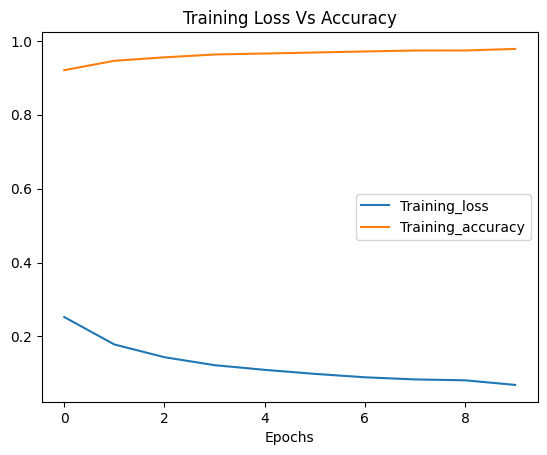

In [22]:
plt.plot(history.history['loss'],label='Training_loss')
plt.plot(history.history['accuracy'],label='Training_accuracy')
plt.xlabel('Epochs')
plt.title('Training Loss Vs Accuracy')
plt.legend()
plt.show()

### **Plot between Testing Loss and Testing Accuracy**

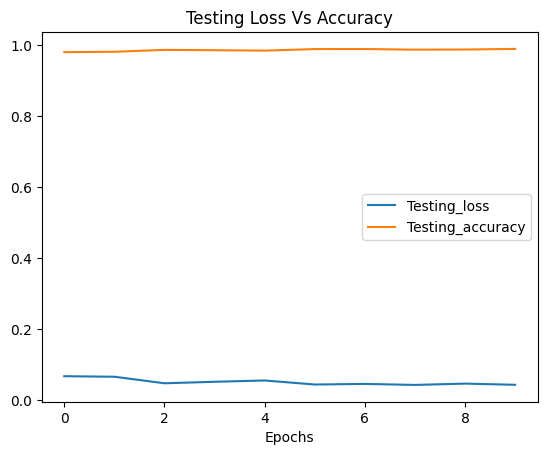

In [23]:
plt.plot(history.history['val_loss'],label='Testing_loss')
plt.plot(history.history['val_accuracy'],label='Testing_accuracy')
plt.xlabel('Epochs')
plt.title('Testing Loss Vs Accuracy')
plt.legend()
plt.show()

## <center> **Model Evaluation** </center>

### **Displaying the Training and Testing Accuracies**

In [24]:
from tensorflow.keras.models import load_model
model=load_model('Digit_Recognizer.h5')
_,train_accuracy=model.evaluate(x_train,y_train)
print(f"Training Accuracy: {train_accuracy}")

840/840 [==============================] - 24s 29ms/step - loss: 0.0578 - accuracy: 0.9832
Training Accuracy: 0.9831845164299011


In [25]:
_,test_accuracy=model.evaluate(x_test,y_test)
print(f"Testing Accuracy: {test_accuracy}")

263/263 [==============================] - 8s 28ms/step - loss: 0.0684 - accuracy: 0.9812
Testing Accuracy: 0.9811905026435852


### **Confusion Matrix for evaluating predictions on Test dataset.**

263/263 [==============================] - 8s 29ms/step


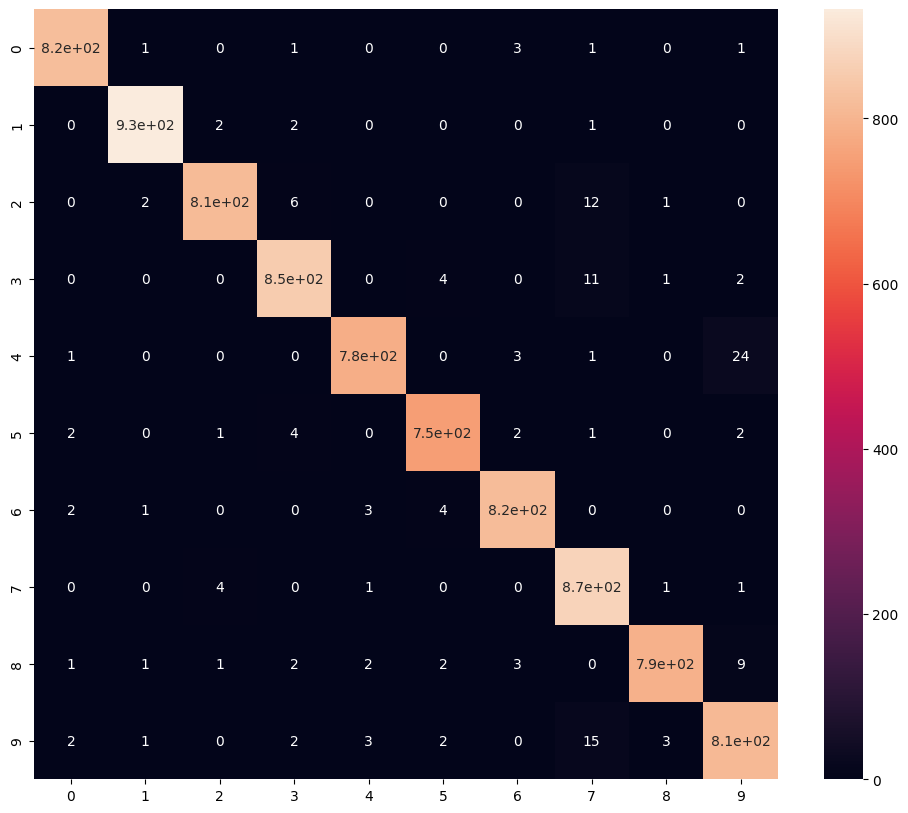

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(12,10))
y_hat=model.predict(x_test)
y_hat=np.argmax(y_hat,axis=1)
y_true=np.argmax(y_test,axis=1)
sns.heatmap(confusion_matrix(y_true,y_hat),annot=True)
plt.show()

### **Classification Report of Test Predictions**

In [27]:
print(classification_report(y_true,y_hat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       827
           1       0.99      0.99      0.99       937
           2       0.99      0.97      0.98       835
           3       0.98      0.98      0.98       870
           4       0.99      0.96      0.98       814
           5       0.98      0.98      0.98       759
           6       0.99      0.99      0.99       827
           7       0.95      0.99      0.97       880
           8       0.99      0.97      0.98       813
           9       0.95      0.97      0.96       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



### **Predicting the digits in the ramdom images and displaying it on the X-axis**

1/1 [==============================] - 0s 14ms/step


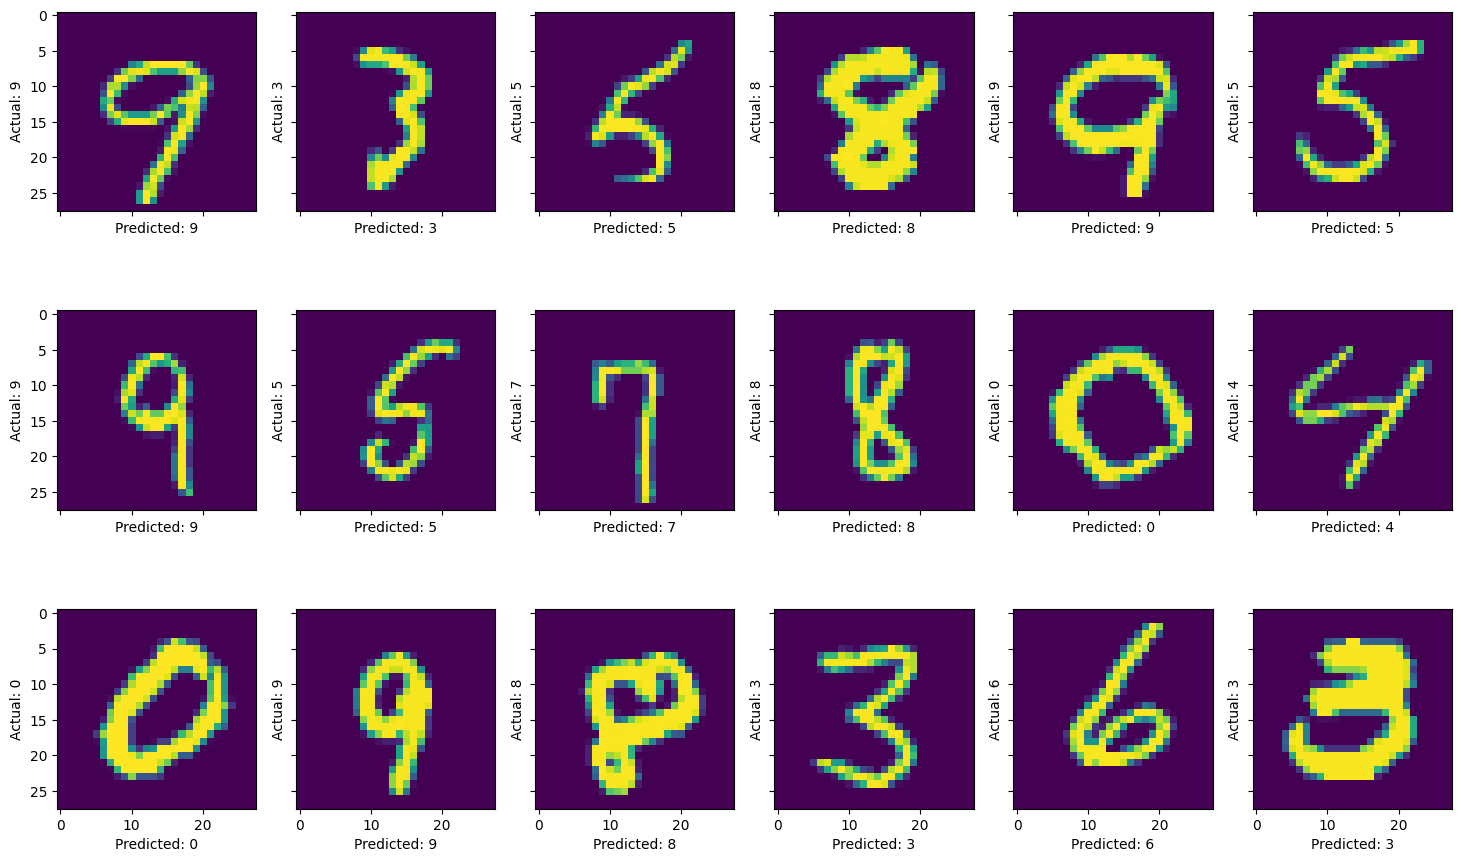

In [28]:
fig,axes=plt.subplots(3,6,figsize=(18,11),sharex=True,sharey=True)
for i,axes in enumerate(axes.flat):
    random_digit=np.random.randint(0,x_test.shape[0])
    axes.set_xlabel(f"Predicted: {np.argmax(model.predict(np.expand_dims(x_test[random_digit],0)))}")
    axes.set_ylabel(f"Actual: {np.argmax(y_test[random_digit])}")
    axes.imshow(x_test[random_digit].reshape(28,28))

### **Making Predictions on the Unseen Data**

In [29]:
test_images=test_df.values
test_images=test_images.reshape(len(test_df),28,28,1)
test_images=test_images/255

In [30]:

y_pred=model.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)
submission=pd.DataFrame({"ImageId":list(range(1,len(y_pred)+1)),"Label": y_pred})
submission.to_csv("submission.csv",index=False,header=True)

875/875 [==============================] - 30s 34ms/step
